In [1]:
import Sprede as sp
import MDAnalysis as mda

In [2]:
u = mda.Universe('Tramp_equil_out_338.data','NVT_338.dcd')

specie = ['1','8','7']
isotopes = ['12C','1H','1H']

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
z = sp.MDAnalysisParser(universe = u, specie = specie, isotopes = isotopes, time_step = 2, step_skip=500, sub_sample_traj=50, n_steps = 5000)


Reading Trajectory: 100%|██████████| 5001/5001 [00:01<00:00, 4043.46it/s]


In [4]:
q_points = z.calculate_q_points(q_max = 2, max_points = 40)

INFO: Pruning at 0.147 < 2
INFO: Pruned from 2947 q-points to 56


In [5]:
incoh_f = z.calculate_Finc_qt(q_points)

  0%|          | 0/101 [00:00<?, ?it/s]/Users/bb24144/Documents/QENS_investigation/QENStin/DEPLOY/Sprede.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  incoh_f[:, i] = np.mean(mean_1 * s_len_sq[:, np.newaxis], axis=0)
100%|██████████| 101/101 [00:21<00:00,  4.81it/s]


In [8]:
incoh_f.shape

(56, 101)

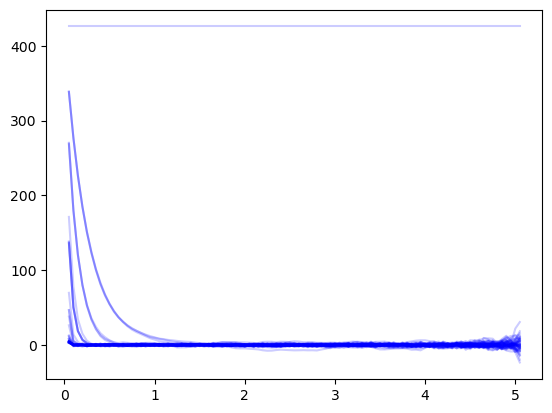

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for i in range(0,len(q_points)):
    ax.plot(z.delta_t/1000000,incoh_f[i].T, 'b', alpha = 0.2)
